In [40]:
import math

transactions = []
f = open("./transactions.csv", "r")
for line in f:
    line = line.split(',')
    l1 = [float(line[0]), float(line[1]), int(line[2])]
    transactions.append(l1)

transactions


[[2.1, 6.4, 1],
 [3.8, 2.2, 1],
 [15.7, 4.4, 1],
 [26.7, 4.6, 1],
 [10.7, 4.9, 1],
 [11.3, 5.1, 1],
 [120.7, 3.1, 1],
 [140.3, 4.1, 1],
 [30.0, 5.1, 1],
 [45.0, 4.2, 1],
 [80.0, 3.7, 1],
 [20.0, 5.2, 1],
 [100.0, 4.0, 1],
 [80.0, 4.0, 1],
 [70.0, 1.5, 1],
 [40.0, 1.0, 0],
 [100.0, 2.0, 0],
 [40.0, 2.7, 0],
 [63.0, 1.5, 0],
 [0.7, 1.2, 0],
 [0.5, 0.8, 0],
 [0.8, 1.5, 0],
 [0.2, 1.1, 0],
 [0.1, 0.8, 0],
 [20.0, 2.2, 0],
 [60.0, 2.1, 0],
 [105.0, 0.4, 0],
 [10.0, 1.2, 0],
 [15.0, 1.7, 0],
 [12.0, 1.0, 0]]

In [41]:
def euclidean(instance1, instance2):
    dist = 0.0
    for i in range(len(instance1)):
        dist += (instance1[i] - instance2[i])**2
    return math.sqrt(dist)

In [42]:
#Implement k-NN algorithm
def get_distances(data, query):
    distances = []
    for i, instance in enumerate(data):  #Enumerate loops over a list while keeping track of indexes of current items
        dist = euclidean(instance[:-1], query) #-1 removes the last value, so mass and height are compared
        distances.append((dist, i))  
    distances.sort() 
    return distances

def knn_estimate(data, query, k=5):
    distances = get_distances(data, query)
    
    votes = {}
    for i in range(k):
        idx = distances[i][1]  
        label = data[idx][-1]  
        votes[label] = votes.get(label, 0) + 1
    
    return max(votes, key=votes.get)

query = [30,2,-1]

print(get_distances(transactions, query))



[(3.0999999999999996, 8), (4.201190307520001, 3), (10.00199980003999, 24), (10.024470060806207, 17), (10.04987562112089, 15), (10.49952379872535, 11), (14.5, 2), (15.002999700059986, 28), (15.16047492659778, 9), (18.027756377319946, 29), (18.95521036549054, 5), (19.51665955024066, 4), (20.015993605114886, 27), (26.200763347658402, 1), (28.244822534404424, 0), (29.204280508172086, 21), (29.31091946698363, 19), (29.524396691549857, 20), (29.813587506370315, 22), (29.924070578716393, 23), (30.000166666203707, 25), (33.0037876614185, 18), (40.00312487793922, 14), (50.02889165272403, 10), (50.039984012787215, 13), (70.0, 16), (70.02856560004639, 12), (75.01706472530101, 26), (90.70667009652597, 6), (110.31998912255204, 7)]


In [43]:
print(knn_estimate(transactions, [30,2], k=5))
print(knn_estimate(transactions, [30,2], k=5))
print(knn_estimate(transactions, [200,6]))

0
0
1


In [61]:
import pandas as pd

df = pd.read_table('fruit_data.txt')

X = df[['mass', 'height']]
Y = df['fruit_name']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

query_df = pd.DataFrame([[21, 5.4]], columns=['mass', 'height'])
query_prediction = knn.predict(query_df)

print(f"Predicted fruit: {query_prediction[0]}")


0.7777777777777778
Predicted fruit: mandarin


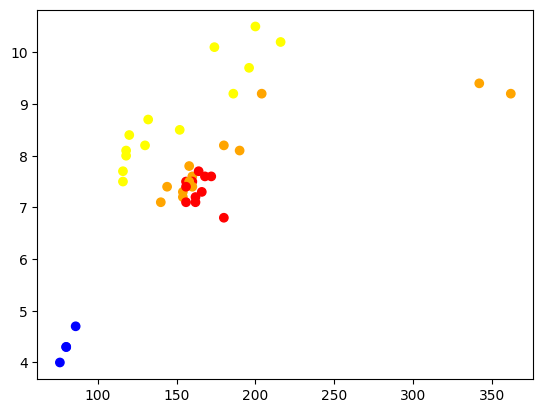

In [50]:
import matplotlib.pyplot as plt
colors_map = {'apple': 'red', 'mandarin': 'blue', 'orange':'orange', 'lemon':'yellow'}
colors = [colors_map[c] for c in y_train]
plt.scatter(X_train.mass, X_train.height, c = colors)


In [68]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("Housing.csv")


X = df[['area', 'bedrooms', 'bathrooms', 'stories']]  
y = df['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) 

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)

# 1 hot encoding
# level encoding

print(knn.score(X_test, y_test))

y_pred = knn.predict(X_test)

print("Predicted prices:", y_pred)

0.21224809297871927
Predicted prices: [4165000.         5565000.         3103333.33333333 5558000.
 4564000.         6206666.66666667 5145000.         3990000.
 3360000.         6265000.         3453333.33333333 3010000.
 5217333.33333333 5868333.33333333 3420666.66666667 4503333.33333333
 6253333.33333333 4159166.66666667 5320000.         5996666.66666667
 5915000.         8131666.66666667 6134333.33333333 3453333.33333333
 5558000.         3406666.66666667 5565000.         3474333.33333333
 6171666.66666667 4118333.33333333 4281666.66666667 4771666.66666667
 3196666.66666667 4760000.         4564000.         4013333.33333333
 3640000.         9403333.33333333 5110000.         4503333.33333333
 3952666.66666667 2135000.         4771666.66666667 4571000.
 3560666.66666667 3332000.         5460000.         6160000.
 4130000.         4876666.66666667 6755000.         3560666.66666667
 7151666.66666667 3209500.         3605000.         7151666.66666667
 7151666.66666667 4970000.         5